<a href="https://colab.research.google.com/github/Fernandinho937/DIO-Projetos/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cálculo de Metricas de Avaliação de Aprendizado

###DESCRIÇÃO
Neste projeto, vamos calcular as principais métricas para avaliação de modelos de classificação de dados, como acurácia, sensibilidade (recall), especificidade, precisão e F-score.

In [14]:
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import seaborn as sns
import pandas as pd

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [15]:
tf.__version__

'2.17.0'

In [16]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [17]:
logdir='log'

In [18]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0,1,2,3,4,5,6,7,8,9]

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.1001 - loss: 6.5934 - val_accuracy: 0.0980 - val_loss: 6.3561
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 32ms/step - accuracy: 0.1013 - loss: 6.3561 - val_accuracy: 0.0980 - val_loss: 6.3561
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.0982 - loss: 6.3561 - val_accuracy: 0.0980 - val_loss: 6.3561
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.0983 - loss: 6.3561 - val_accuracy: 0.0980 - val_loss: 6.3561
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.0981 - loss: 6.3561 - val_accuracy: 0.0980 - val_loss: 6.3561


In [22]:
y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [23]:
classes = [0,1,2,3,4,5,6,7,8,9]

In [24]:
# Calcula a matriz de confusão
con_mat = confusion_matrix(y_true, y_pred)

# Cria o DataFrame
con_mat_df = pd.DataFrame(con_mat, index=classes, columns=classes)


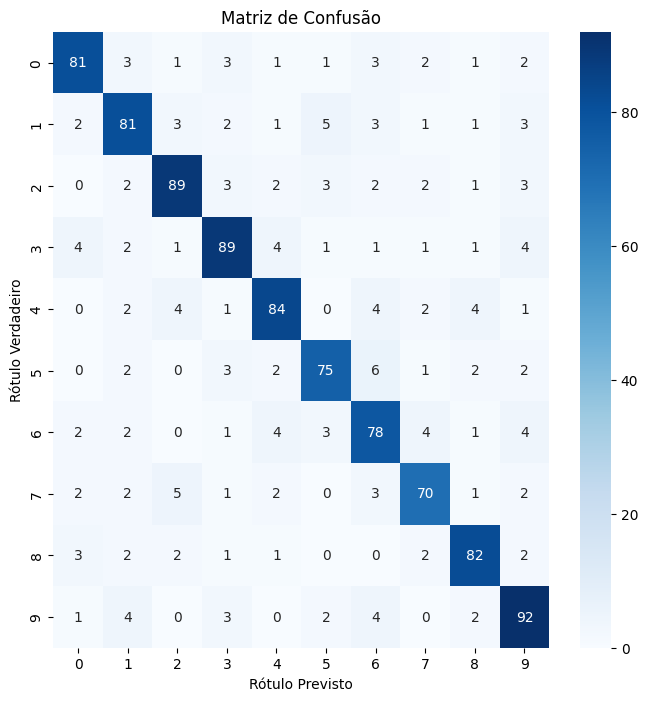

DataFrame com as Métricas de Avaliação:
                    Metric     Value
0                Acurácia  0.821000
1  Recall (Sensibilidade)  0.820482
2                Precisão  0.821886
3                F1-Score  0.820976

Relatório de Classificação como DataFrame:
               precision    recall  f1-score   support
0              0.852632  0.826531  0.839378    98.000
1              0.794118  0.794118  0.794118   102.000
2              0.847619  0.831776  0.839623   107.000
3              0.831776  0.824074  0.827907   108.000
4              0.831683  0.823529  0.827586   102.000
5              0.833333  0.806452  0.819672    93.000
6              0.750000  0.787879  0.768473    99.000
7              0.823529  0.795455  0.809249    88.000
8              0.854167  0.863158  0.858639    95.000
9              0.800000  0.851852  0.825112   108.000
accuracy       0.821000  0.821000  0.821000     0.821
macro avg      0.821886  0.820482  0.820976  1000.000
weighted avg   0.821683  0.82100

In [25]:
# Classes de exemplo de 0 a 9
classes = list(range(10))

# Gerando valores fictícios para y_true e y_pred
np.random.seed(0)
y_true = np.random.choice(classes, 1000, p=[0.1]*10)  # Distribuição uniforme
y_pred = y_true.copy()

num_errors = int(0.2 * len(y_pred))  # 20% de erro
error_indices = np.random.choice(len(y_pred), num_errors, replace=False)
y_pred[error_indices] = np.random.choice(classes, num_errors)

# Calculando a matriz de confusão e criando um DataFrame
con_mat = confusion_matrix(y_true, y_pred)
con_mat_df = pd.DataFrame(con_mat, index=classes, columns=classes)

# Exibindo a matriz de confusão com o Seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.title("Matriz de Confusão")
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Previsto')
plt.show()

# Calculando as métricas e organizando-as em um DataFrame
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

metrics_df = pd.DataFrame({
    "Metric": ["Acurácia", "Recall (Sensibilidade)", "Precisão", "F1-Score"],
    "Value": [accuracy, recall, precision, f1]
})

print("DataFrame com as Métricas de Avaliação:\n", metrics_df)

# Exibindo o relatório de classificação completo como DataFrame
class_report = classification_report(y_true, y_pred, target_names=[str(c) for c in classes], output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()

print("\nRelatório de Classificação como DataFrame:\n", class_report_df)


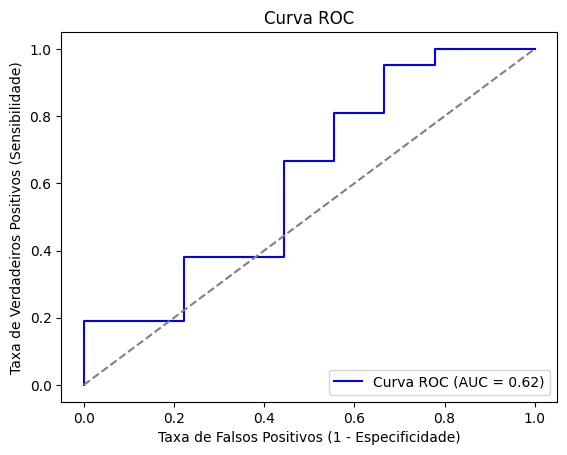

In [26]:
np.random.seed(0)
X = np.random.rand(100, 2)
y = np.random.randint(0, 2, 100)

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando um classificador (nesse caso, uma regressão logística)
model = LogisticRegression()
model.fit(X_train, y_train)

# Obter as probabilidades para a classe positiva
y_probs = model.predict_proba(X_test)[:, 1]

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plotando a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha de chance
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
